In [2]:
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv("Best_30_Years_semi_monthly.csv", index_col=0)
df

,PRCP_US1UTWS0009,PRCP_USC00421285,PRCP_USC00421918,TMIN_USC00421918,TMAX_USC00421918,PRCP_USC00422294,TMIN_USC00422294,TMAX_USC00422294,PRCP_USC00422726,PRCP_USC00423335,...,TMAX_USC00429133,PRCP_USC00429560,TMIN_USC00429560,TMAX_USC00429560,PRCP_USW00024126,SNOW_USW00024126,SNWD_USW00024126,TMIN_USW00024126,TMAX_USW00024126,depth
up to 1958-10-31,3.500000,15.142857,10.000000,-29.714286,139.571429,8.428571,-18.571429,146.000000,6.571429,8.142857,...,130.571429,17.714286,-22.928571,108.357143,9.285714,0.714286,0.000000,27.071429,161.500000,4195.25
up to 1958-11-15,4.600000,19.266667,6.266667,-109.133333,37.533333,10.200000,-113.733333,31.933333,33.133333,15.600000,...,31.400000,7.333333,-154.200000,-10.666667,10.533333,16.933333,44.066667,-69.533333,44.533333,NaN
up to 1958-11-30,7.933333,13.866667,6.933333,-79.600000,83.266667,5.600000,-51.066667,94.066667,3.400000,0.000000,...,84.200000,1.533333,-75.866667,48.600000,4.266667,0.000000,0.000000,-20.066667,94.800000,4195.30
up to 1958-12-15,5.562500,10.625000,6.812500,-114.562500,58.750000,2.062500,-87.875000,57.312500,1.000000,4.937500,...,60.062500,3.187500,-119.125000,29.187500,4.687500,4.625000,4.687500,-42.000000,61.562500,NaN
up to 1958-12-31,6.600000,8.466667,10.000000,-125.133333,16.200000,4.200000,-111.466667,37.133333,3.400000,1.153846,...,37.133333,0.866667,-157.400000,-7.466667,2.533333,3.200000,5.000000,-47.466667,51.866667,4195.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up to 1988-08-31,3.533333,2.400000,6.933333,32.600000,262.600000,0.200000,61.600000,267.000000,3.266667,4.733333,...,279.400000,6.466667,13.866667,235.933333,0.866667,0.000000,0.000000,121.200000,281.000000,4206.90
up to 1988-09-15,3.066667,1.000000,4.400000,4.533333,211.933333,0.666667,11.600000,226.333333,1.866667,3.533333,...,227.466667,0.533333,-31.000000,209.000000,0.400000,0.000000,0.000000,88.200000,228.133333,4206.40
up to 1988-09-30,9.533333,3.466667,7.600000,5.933333,224.200000,1.866667,20.466667,236.333333,0.000000,1.000000,...,231.400000,0.000000,-35.866667,218.000000,0.200000,0.000000,0.000000,91.800000,250.933333,4206.20
up to 1988-10-15,0.000000,0.000000,0.312500,-12.312500,202.187500,0.000000,-9.000000,204.187500,0.000000,0.000000,...,215.062500,0.000000,-37.437500,182.875000,0.000000,0.000000,0.000000,62.062500,220.187500,4206.10


In [7]:
df.isna().sum()

PRCP_US1UTWS0009     0
PRCP_USC00421285     0
PRCP_USC00421918     0
TMIN_USC00421918     1
TMAX_USC00421918     1
PRCP_USC00422294     0
TMIN_USC00422294     0
TMAX_USC00422294     0
PRCP_USC00422726     0
PRCP_USC00423335     0
TMIN_USC00424846     0
TMAX_USC00424846     0
PRCP_USC00425705     0
TMIN_USC00425705     0
TMAX_USC00425705     0
PRCP_USC00427255     0
TMIN_USC00427255     0
TMAX_USC00427255     0
PRCP_USC00427576     0
TMIN_USC00427576     0
PRCP_USC00428114     0
TMIN_USC00428114     0
TMAX_USC00428114     0
PRCP_USC00428668     0
PRCP_USC00428741     0
SNOW_USC00428741     0
SNWD_USC00428741     0
TMIN_USC00428741     0
TMAX_USC00428741     0
TMIN_USC00428939     0
TMAX_USC00428939     0
PRCP_USC00429133     0
TMIN_USC00429133     0
TMAX_USC00429133     0
PRCP_USC00429560     0
TMIN_USC00429560     0
TMAX_USC00429560     0
PRCP_USW00024126     0
SNOW_USW00024126     0
SNWD_USW00024126     0
TMIN_USW00024126     0
TMAX_USW00024126     0
depth               24
dtype: int6

In [8]:
# Let's drop the NaNs for now
df = df.dropna()

In [9]:
# Split train and test
split_index = int(len(df) *.7)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In the next cells, I fit the model, remove columns with a high p-value, and repeat. I stopped removing columns when the BIC began to go up again. This happened at alpha = .04

In [10]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth'))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     21.87
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.63e-83
Time:                        18:52:44   Log-Likelihood:                -953.54
No. Observations:                 487   AIC:                             1993.
Df Residuals:                     444   BIC:                             2173.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4190.8400      1.123   3732.039      0.000    4188.633    4193.047
PRCP_US1UTWS0009     0.0506      0.018      2.757      0.006       0.015       0.087
PRCP_USC00421285    -0.0006      0.013     -0.049      0.961      -0.026       0.025
PRCP_USC00421918     0.0012      0.002      0.655      0.513      -0.002       0.005
TMIN_USC00421918    -0.0352      0.009     -3.996      0.000      -0.052      -0.018
TMAX_USC00421918     0.0433      0.011      3.958      0.000       0.022       0.065
PRCP_USC00422294    -0.0037      0.023     -0.160      0.873      -0.049       0.041
TMIN_USC00422294     0.0222      0.011      2.066      0.039       0.001       0.043
TMAX_USC00422294    -0.1228      0.015     -8.274      0.000      -0.152      -0.094
PRCP_USC00422726     0.0043      0.017      0.256      0.798      -0.029       0.038
PRCP_USC00423335     0.0092      0.022      0.419      0.676      -0.034       0.052
TMIN_USC00424846     0.0270      0.007      4.090      0.000       0.014       0.040
TMAX_USC00424846    -0.0389      0.011     -3.403      0.001      -0.061      -0.016
PRCP_USC00425705     0.0112      0.014      0.791      0.429      -0.017       0.039
TMIN_USC00425705     0.0308      0.011      2.875      0.004       0.010       0.052
TMAX_USC00425705     0.0007      0.012      0.060      0.952      -0.023       0.024
PRCP_USC00427255    -0.0027      0.012     -0.221      0.826      -0.027       0.022
TMIN_USC00427255    -0.0425      0.009     -4.499      0.000      -0.061      -0.024
TMAX_USC00427255    -0.0064      0.011     -0.600      0.549      -0.027       0.015
PRCP_USC00427576    -0.0212      0.021     -1.002      0.317      -0.063       0.020
TMIN_USC00427576    -0.0134      0.009     -1.460      0.145      -0.031       0.005
PRCP_USC00428114    -0.0021      0.013     -0.162      0.872      -0.028       0.024
TMIN_USC00428114    -0.0193      0.013     -1.432      0.153      -0.046       0.007
TMAX_USC00428114    -0.0023      0.017     -0.137      0.891      -0.035       0.030
PRCP_USC00428668    -0.0358      0.011     -3.156      0.002      -0.058      -0.014
PRCP_USC00428741  5.956e-05      0.021      0.003      0.998      -0.041       0.041
SNOW_USC00428741     0.0063      0.022      0.289      0.773      -0.037       0.049
SNWD_USC00428741    -0.0019      0.003     -0.576      0.565      -0.008       0.005
TMIN_USC00428741    -0.0888      0.013     -7.076      0.000      -0.113      -0.064
TMAX_USC00428741     0.0483      0.016      3.005      0.003       0.017       0.080
TMIN_USC00428939    -0.0541      0.010     -5.206      0.000      -0.075      -0.034
TMAX_USC00428939     0.0270      0.014      1.932      0.054      -0.000       0.054
PRCP_USC00429133    -0.0354      0.020     -1.755      0.080      -0.075       0.004
TMIN_USC00429133    -0.

In [11]:
dropped_cols = model.pvalues[model.pvalues > .5].index
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'TMAX_USC00425705',
       'PRCP_USC00427255', 'TMAX_USC00427255', 'PRCP_USC00428114',
       'TMAX_USC00428114', 'PRCP_USC00428741', 'SNOW_USC00428741',
       'SNWD_USC00428741', 'PRCP_USC00429560', 'TMAX_USC00429560',
       'PRCP_USW00024126', 'SNOW_USW00024126', 'TMAX_USW00024126'],
      dtype='object')

In [12]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     38.99
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           3.53e-95
Time:                        18:52:59   Log-Likelihood:                -957.01
No. Observations:                 487   AIC:                             1964.
Df Residuals:                     462   BIC:                             2069.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4190.7250      1.027   4081.927      0.000    4188.707    4192.742
PRCP_US1UTWS0009     0.0557      0.017      3.330      0.001       0.023       0.089
TMIN_USC00421918    -0.0328      0.008     -3.897      0.000      -0.049      -0.016
TMAX_USC00421918     0.0425      0.010      4.183      0.000       0.023       0.063
TMIN_USC00422294     0.0251      0.010      2.426      0.016       0.005       0.045
TMAX_USC00422294    -0.1219      0.013     -9.436      0.000      -0.147      -0.096
TMIN_USC00424846     0.0264      0.006      4.294      0.000       0.014       0.039
TMAX_USC00424846    -0.0392      0.009     -4.239      0.000      -0.057      -0.021
PRCP_USC00425705     0.0137      0.012      1.168      0.243      -0.009       0.037
TMIN_USC00425705     0.0313      0.010      3.117      0.002       0.012       0.051
TMIN_USC00427255    -0.0453      0.008     -5.684      0.000      -0.061      -0.030
PRCP_USC00427576    -0.0069      0.016     -0.433      0.665      -0.038       0.024
TMIN_USC00427576    -0.0135      0.009     -1.537      0.125      -0.031       0.004
TMIN_USC00428114    -0.0226      0.012     -1.851      0.065      -0.047       0.001
PRCP_USC00428668    -0.0374      0.011     -3.494      0.001      -0.058      -0.016
TMIN_USC00428741    -0.0892      0.012     -7.548      0.000      -0.112      -0.066
TMAX_USC00428741     0.0424      0.014      3.120      0.002       0.016       0.069
TMIN_USC00428939    -0.0526      0.010     -5.492      0.000      -0.071      -0.034
TMAX_USC00428939     0.0222      0.010      2.170      0.031       0.002       0.042
PRCP_USC00429133    -0.0358      0.016     -2.252      0.025      -0.067      -0.005
TMIN_USC00429133    -0.0268      0.009     -3.141      0.002      -0.044      -0.010
TMAX_USC00429133     0.0921      0.012      7.685      0.000       0.069       0.116
TMIN_USC00429560     0.0074      0.007      1.113      0.266      -0.006       0.020
SNWD_USW00024126     0.0116      0.005      2.391      0.017       0.002       0.021
TMIN_USW00024126     0.1558      0.009     16.759      0.000       0.138       0.174
==============================================================================
Omnibus:                        3.475   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.596
Skew:                          -0.108   Prob(JB):                        0.166
Kurtosis:                       3.361   Cond. No.                     6.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical probl

In [13]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .2].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429560', 'PRCP_USW00024126',
       'SNOW_USC00428741', 'SNOW_USW00024126', 'SNWD_USC00428741',
       'TMAX_USC00425705', 'TMAX_USC00427255', 'TMAX_USC00428114',
       'TMAX_USC00429560', 'TMAX_USW00024126', 'TMIN_USC00429560'],
      dtype='object')

In [14]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     44.47
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           4.42e-97
Time:                        18:53:20   Log-Likelihood:                -958.39
No. Observations:                 487   AIC:                             1961.
Df Residuals:                     465   BIC:                             2053.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4190.3317      0.968   4327.713      0.000    4188.429    4192.234
PRCP_US1UTWS0009     0.0569      0.016      3.565      0.000       0.026       0.088
TMIN_USC00421918    -0.0308      0.008     -3.733      0.000      -0.047      -0.015
TMAX_USC00421918     0.0436      0.010      4.321      0.000       0.024       0.063
TMIN_USC00422294     0.0280      0.010      2.793      0.005       0.008       0.048
TMAX_USC00422294    -0.1233      0.013     -9.584      0.000      -0.149      -0.098
TMIN_USC00424846     0.0276      0.006      4.541      0.000       0.016       0.040
TMAX_USC00424846    -0.0402      0.009     -4.367      0.000      -0.058      -0.022
TMIN_USC00425705     0.0332      0.010      3.359      0.001       0.014       0.053
TMIN_USC00427255    -0.0447      0.008     -5.652      0.000      -0.060      -0.029
TMIN_USC00427576    -0.0136      0.009     -1.555      0.121      -0.031       0.004
TMIN_USC00428114    -0.0240      0.012     -1.975      0.049      -0.048      -0.000
PRCP_USC00428668    -0.0362      0.011     -3.437      0.001      -0.057      -0.015
TMIN_USC00428741    -0.0907      0.012     -7.885      0.000      -0.113      -0.068
TMAX_USC00428741     0.0479      0.013      3.660      0.000       0.022       0.074
TMIN_USC00428939    -0.0531      0.010     -5.558      0.000      -0.072      -0.034
TMAX_USC00428939     0.0213      0.010      2.110      0.035       0.001       0.041
PRCP_USC00429133    -0.0279      0.014     -2.041      0.042      -0.055      -0.001
TMIN_USC00429133    -0.0248      0.008     -2.968      0.003      -0.041      -0.008
TMAX_USC00429133     0.0915      0.012      7.647      0.000       0.068       0.115
SNWD_USW00024126     0.0113      0.005      2.377      0.018       0.002       0.021
TMIN_USW00024126     0.1537      0.009     16.904      0.000       0.136       0.172
==============================================================================
Omnibus:                        3.355   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                3.536
Skew:                          -0.092   Prob(JB):                        0.171
Kurtosis:                       3.374   Cond. No.                     5.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .1].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429560', 'PRCP_USW00024126',
       'SNOW_USC00428741', 'SNOW_USW00024126', 'SNWD_USC00428741',
       'TMAX_USC00425705', 'TMAX_USC00427255', 'TMAX_USC00428114',
       'TMAX_USC00429560', 'TMAX_USW00024126', 'TMIN_USC00427576',
       'TMIN_USC00429560'],
      dtype='object')

In [16]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     46.43
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.09e-97
Time:                        18:54:12   Log-Likelihood:                -959.66
No. Observations:                 487   AIC:                             1961.
Df Residuals:                     466   BIC:                             2049.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4190.3848      0.969   4323.884      0.000    4188.480    4192.289
PRCP_US1UTWS0009     0.0564      0.016      3.527      0.000       0.025       0.088
TMIN_USC00421918    -0.0315      0.008     -3.826      0.000      -0.048      -0.015
TMAX_USC00421918     0.0439      0.010      4.348      0.000       0.024       0.064
TMIN_USC00422294     0.0298      0.010      2.984      0.003       0.010       0.049
TMAX_USC00422294    -0.1251      0.013     -9.755      0.000      -0.150      -0.100
TMIN_USC00424846     0.0277      0.006      4.548      0.000       0.016       0.040
TMAX_USC00424846    -0.0406      0.009     -4.399      0.000      -0.059      -0.022
TMIN_USC00425705     0.0327      0.010      3.306      0.001       0.013       0.052
TMIN_USC00427255    -0.0459      0.008     -5.822      0.000      -0.061      -0.030
TMIN_USC00428114    -0.0218      0.012     -1.799      0.073      -0.046       0.002
PRCP_USC00428668    -0.0362      0.011     -3.433      0.001      -0.057      -0.015
TMIN_USC00428741    -0.0932      0.011     -8.164      0.000      -0.116      -0.071
TMAX_USC00428741     0.0477      0.013      3.636      0.000       0.022       0.073
TMIN_USC00428939    -0.0589      0.009     -6.697      0.000      -0.076      -0.042
TMAX_USC00428939     0.0190      0.010      1.904      0.058      -0.001       0.039
PRCP_USC00429133    -0.0271      0.014     -1.986      0.048      -0.054      -0.000
TMIN_USC00429133    -0.0255      0.008     -3.054      0.002      -0.042      -0.009
TMAX_USC00429133     0.0943      0.012      7.955      0.000       0.071       0.118
SNWD_USW00024126     0.0113      0.005      2.360      0.019       0.002       0.021
TMIN_USW00024126     0.1487      0.009     17.462      0.000       0.132       0.165
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.445
Skew:                          -0.094   Prob(JB):                        0.179
Kurtosis:                       3.367   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .04].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429133', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USC00428741', 'SNOW_USW00024126',
       'SNWD_USC00428741', 'SNWD_USW00024126', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'TMAX_USC00428114', 'TMAX_USC00428939',
       'TMAX_USC00429560', 'TMAX_USW00024126', 'TMIN_USC00427576',
       'TMIN_USC00428114', 'TMIN_USC00429560'],
      dtype='object')

In [28]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     55.92
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           7.45e-98
Time:                        18:55:32   Log-Likelihood:                -967.02
No. Observations:                 487   AIC:                             1968.
Df Residuals:                     470   BIC:                             2039.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4190.4996      0.963   4352.731      0.000    4188.608    4192.391
PRCP_US1UTWS0009     0.0524      0.015      3.490      0.001       0.023       0.082
TMIN_USC00421918    -0.0339      0.008     -4.147      0.000      -0.050      -0.018
TMAX_USC00421918     0.0400      0.010      4.082      0.000       0.021       0.059
TMIN_USC00422294     0.0301      0.010      2.992      0.003       0.010       0.050
TMAX_USC00422294    -0.1308      0.013    -10.392      0.000      -0.156      -0.106
TMIN_USC00424846     0.0253      0.006      4.164      0.000       0.013       0.037
TMAX_USC00424846    -0.0324      0.009     -3.714      0.000      -0.050      -0.015
TMIN_USC00425705     0.0330      0.010      3.304      0.001       0.013       0.053
TMIN_USC00427255    -0.0474      0.008     -5.954      0.000      -0.063      -0.032
PRCP_USC00428668    -0.0444      0.010     -4.299      0.000      -0.065      -0.024
TMIN_USC00428741    -0.0963      0.011     -8.830      0.000      -0.118      -0.075
TMAX_USC00428741     0.0645      0.011      5.930      0.000       0.043       0.086
TMIN_USC00428939    -0.0613      0.008     -7.599      0.000      -0.077      -0.045
TMIN_USC00429133    -0.0267      0.008     -3.239      0.001      -0.043      -0.011
TMAX_USC00429133     0.0962      0.012      8.190      0.000       0.073       0.119
TMIN_USW00024126     0.1418      0.008     17.052      0.000       0.125       0.158
==============================================================================
Omnibus:                        3.309   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                3.221
Skew:                          -0.133   Prob(JB):                        0.200
Kurtosis:                       3.297   Cond. No.                     5.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:title={'center':'Semi-Monthly OLS Predictions'}, xlabel='Dates', ylabel='Lake Depth (ft)'>

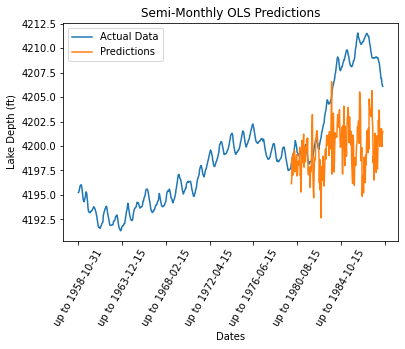

In [36]:
important_cols = list(model.params[1:].index)
predictions = model.predict(sm.add_constant(test[important_cols]))
filled_predictions = df.depth.copy()
filled_predictions[:-len(predictions)] = None
filled_predictions[-len(predictions):] = predictions

df.depth.plot(label="Actual Data", legend=True, title="Semi-Monthly OLS Predictions", xlabel="Dates", ylabel="Lake Depth (ft)")
filled_predictions.plot(label="Predictions", legend=True, rot=60)




In [35]:
important_cols

['PRCP_US1UTWS0009',
 'TMIN_USC00421918',
 'TMAX_USC00421918',
 'TMIN_USC00422294',
 'TMAX_USC00422294',
 'TMIN_USC00424846',
 'TMAX_USC00424846',
 'TMIN_USC00425705',
 'TMIN_USC00427255',
 'PRCP_USC00428668',
 'TMIN_USC00428741',
 'TMAX_USC00428741',
 'TMIN_USC00428939',
 'TMIN_USC00429133',
 'TMAX_USC00429133',
 'TMIN_USW00024126']